__May 4th 2020 (BP)__: Constraining the trace norm of the phi = W @ x matrix  

__May 18th 2020 (BP)__: Generating the weights using a gaussian process

In [188]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.svm import LinearSVC
import numpy as np
import numpy.linalg as la
import scipy
from estimator import RFClassifier, relu

In [189]:
# tests to check the estimator.py
from data_fns import pure_sine_dft
from sklearn.model_selection import train_test_split

X, y = pure_sine_dft(nPoints=5000, fs=1500, sig_dur=0.1, k=6, a=0.7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [190]:
clf = RFClassifier(width=20, weights='white noise', weight_fun=None, nonlinearity=relu)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.579

Generate bandpass weights using the dft matrix.

In [22]:
import matplotlib.pyplot as plt

In [23]:
X, y = pure_sine_dft(nPoints=5000, fs=1500, sig_dur=0.1, k=6, a=0.95)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

M, N = 20, X.shape[1]

In [24]:
dft = scipy.linalg.dft(N, scale=None)

lowcut, highcut = 1, 20
rand = np.zeros((M, N))
rand[:, lowcut:highcut] = np.random.normal(size=(M, highcut-lowcut))
W = (rand @ dft).real.T
W /= np.std(W, axis=0)

In [25]:
def bp_gaus_weights_dft(M, N, lowcut, highcut):
    dft = scipy.linalg.dft(N, scale=None)
    rand = np.zeros((M, N), dtype=complex)
    phi = np.random.uniform(-np.pi, np.pi, (M, highcut - lowcut))
    rand[:, lowcut:highcut] = np.random.normal(size=(M, highcut-lowcut)).astype(complex) * np.e ** (1j * phi)
#     rand[:, lowcut:highcut] = np.random.normal(size=(M, highcut-lowcut))
    W = (rand @ dft).real.T
    W /= np.std(W, axis=0)
    return W

def white_noise_weights_dft(M, N):
    dft = scipy.linalg.dft(N, scale=None)
    rand = np.random.normal(size=(M, N))
    W = (rand @ dft).real.T
    W /= np.std(W, axis=0)
    return W

In [26]:
wt  = bp_gaus_weights_dft(M, N, 5, 8)
print(la.norm(wt, axis=0))

wn_wt = white_noise_weights_dft(M, N)
print(la.norm(wn_wt, axis=0))

[12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871]
[12.26033745 12.37793938 12.29128951 12.4569304  12.26421398 12.58800604
 12.28755591 12.25118224 12.39564047 12.24940806 12.2526839  12.38932319
 12.42644782 12.25447972 12.30048941 12.27359643 12.25761773 12.40581309
 12.51743164 12.31091313]


0.9487162364665251 0.9723093894825832


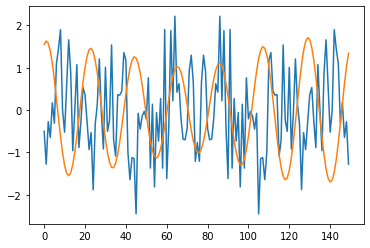

In [28]:
print(np.mean(np.std(wt, axis=1)), np.mean(np.std(wn_wt, axis=1)))

fig = plt.figure()
plt.plot(wn_wt[:, 0])
plt.plot(wt[:,18])

Generate weights from a gaussian process

In [125]:
def bp_weights_dft(M, N, lowcut, highcut):
    dft = scipy.linalg.dft(N, scale=None)
    rand = np.zeros((M, N), dtype=complex)
    rand[:, lowcut:highcut] = np.random.normal(0, 1, size=(M, highcut-lowcut, 2)).view(np.complex).squeeze()
    W = (rand @ dft).real
    W /= np.std(W, axis=1).reshape(-1, 1)
    return W.T

def white_noise_weights_dft(M, N):
    dft = scipy.linalg.dft(N, scale=None)
    rand = np.random.normal(0, 1, size=(M, N, 2)).view(np.complex).squeeze()
    W = (rand @ dft).real.T
    W /= np.std(W, axis=0)
    return W

In [126]:
wt  = bp_weights_dft(M, N, 5, 8)
print(la.norm(wt, axis=0))

wn_wt = white_noise_weights_dft(M, N)
print(la.norm(wn_wt, axis=0))

[12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871 12.24744871
 12.24744871 12.24744871]
[12.2482832  12.35581981 12.25880002 12.42287527 12.2683802  12.32058104
 12.29792931 12.34340372 12.25256032 12.25584383 12.24789052 12.25295483
 12.25261188 12.25035286 12.26865218 12.27719449 12.32714957 12.33411544
 12.25456245 12.25065299]


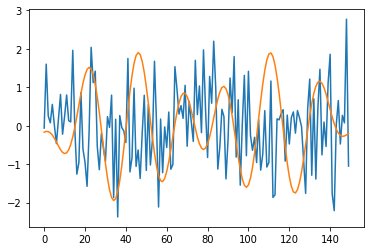

In [127]:
fig = plt.figure()
plt.plot(wn_wt[:, 0])
plt.plot(wt[:, 11])